In [1]:
import numpy as np
import math
import nest
import nest.raster_plot
import matplotlib.pyplot as plt
import scipy.stats as stats


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:57

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
itds = np.arange(-1,1.05,0.05)
MNTBCs2MSO_weights = [-2.0, -4.0, -6.0, -8.0, -10.0, -12.0, -14.0, -16.0, -20.0, -24.0]
n_battery = len(MNTBCs2MSO_weights)

rate_group3 = np.zeros([n_battery, len(itds)])
rate_group4 = np.zeros([n_battery, len(itds)])
rate_group5 = np.zeros([n_battery, len(itds)])

In [3]:
for n in range(len(itds)):
    rate_group3[:,n] = np.loadtxt('data_ITDs_1000_new_weights/rate_group3_itd_{}'.format(round(itds[n],2)), delimiter=',')
    rate_group4[:,n] = np.loadtxt('data_ITDs_1000_new_weights/rate_group4_itd_{}'.format(round(itds[n],2)), delimiter=',')
    rate_group5[:,n] = np.loadtxt('data_ITDs_1000_new_weights/rate_group5_itd_{}'.format(round(itds[n],2)), delimiter=',')

In [6]:
rate_groups = (rate_group3 + rate_group4 + rate_group5)/3
np.savetxt("rate_groups", rate_groups)

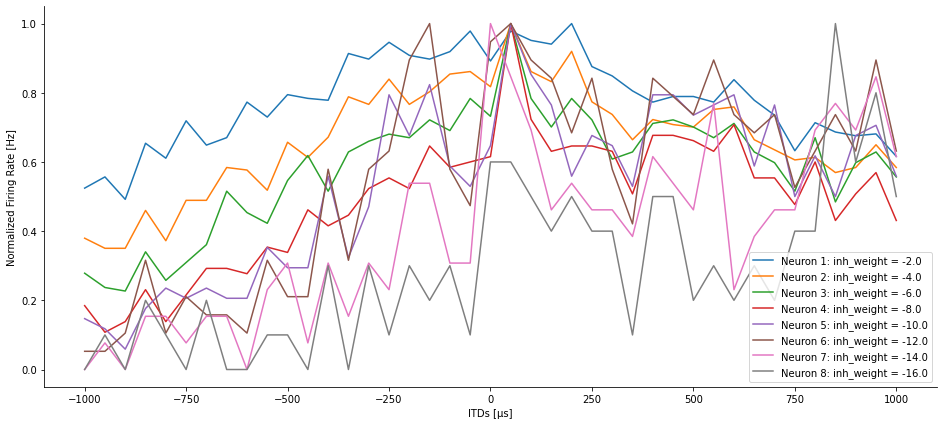

In [5]:
rate_groups_norm = np.zeros([n_battery, len(itds)])
fig, ax = plt.subplots(1,1, figsize = (16,7))
for i in range(n_battery-2):
    rate_groups_norm[i][:] = rate_groups[i][:]/np.max(rate_groups[i][:])
    ax.plot(itds*1000, rate_groups_norm[i][:], label = "Neuron {}: inh_weight = {}".format(i+1, MNTBCs2MSO_weights[i]))
ax.set_ylabel('Normalized Firing Rate [Hz]')
ax.set_xlabel("ITDs [\u03bcs]")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc = 4)

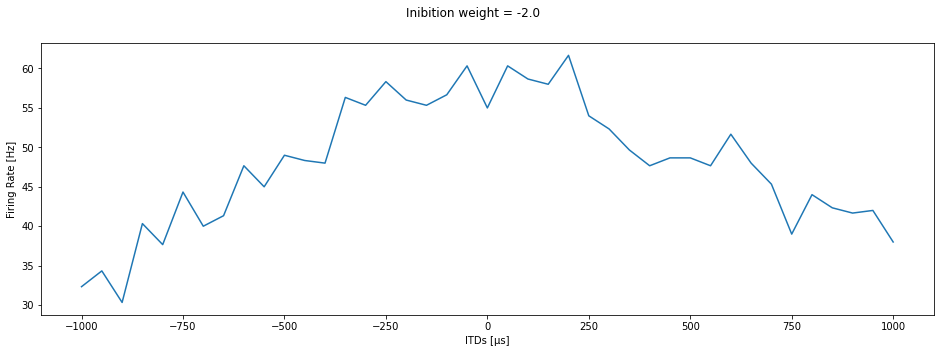

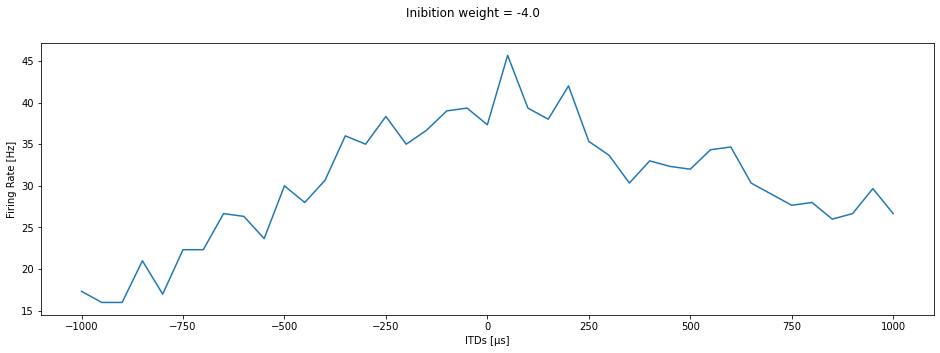

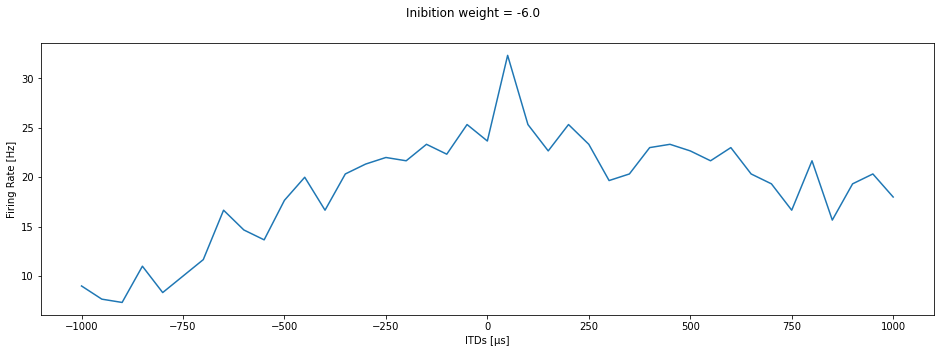

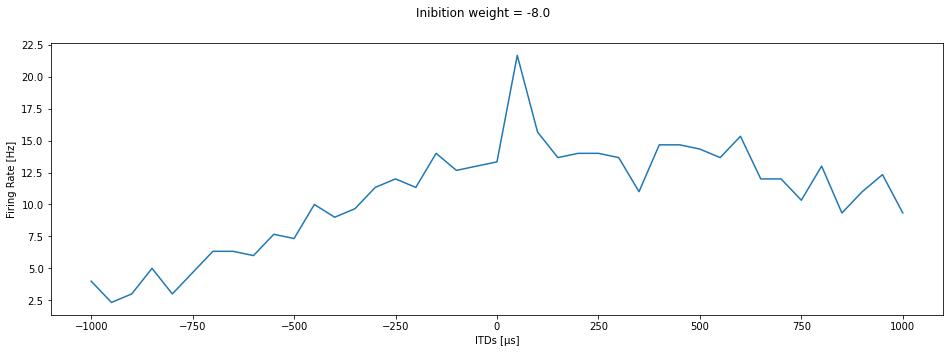

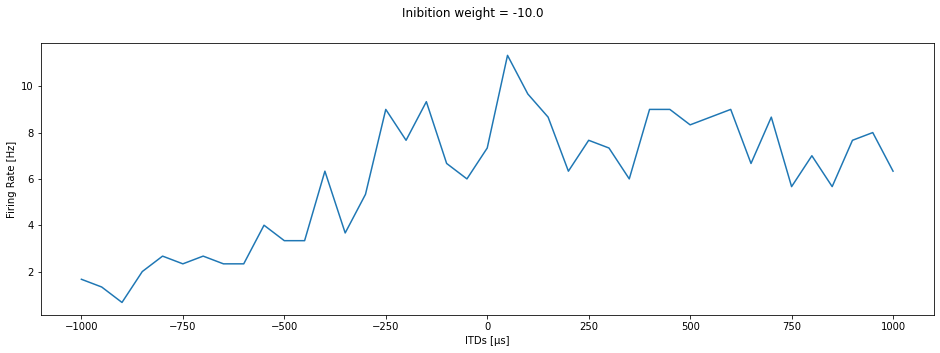

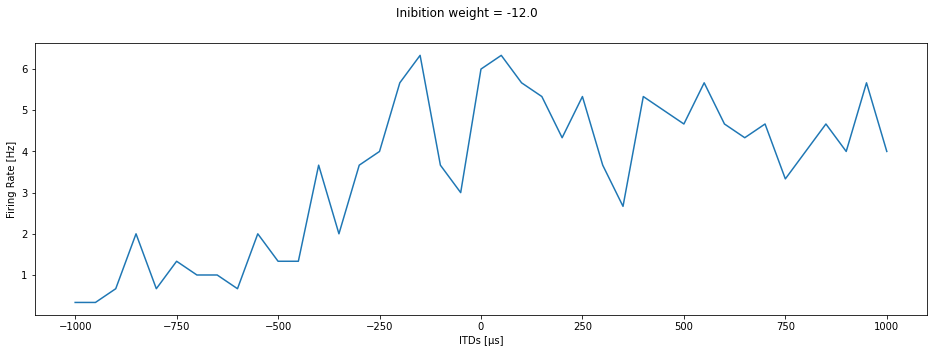

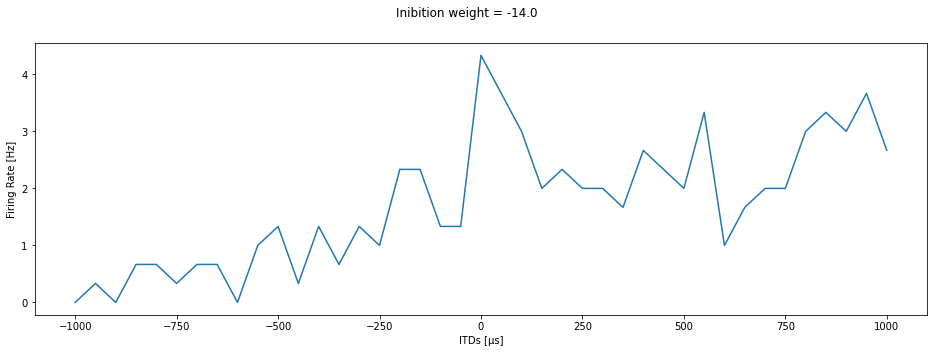

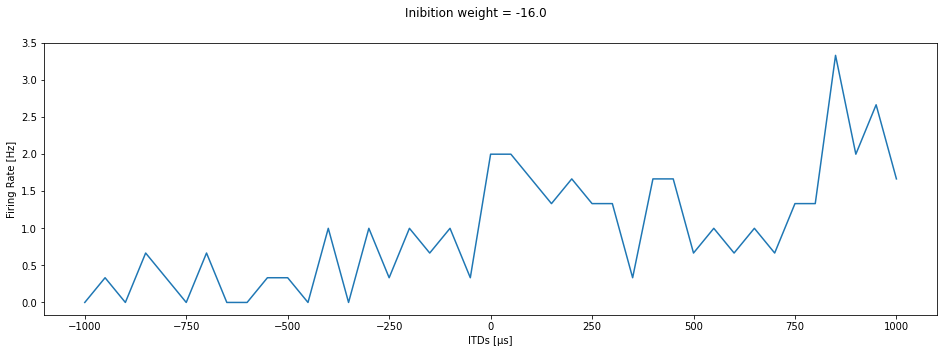

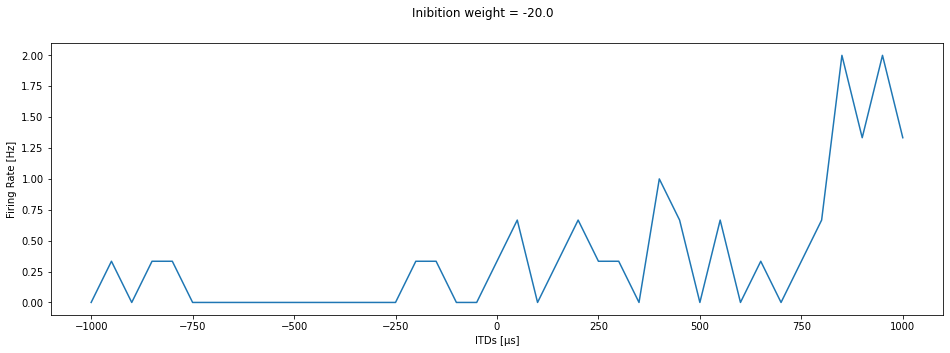

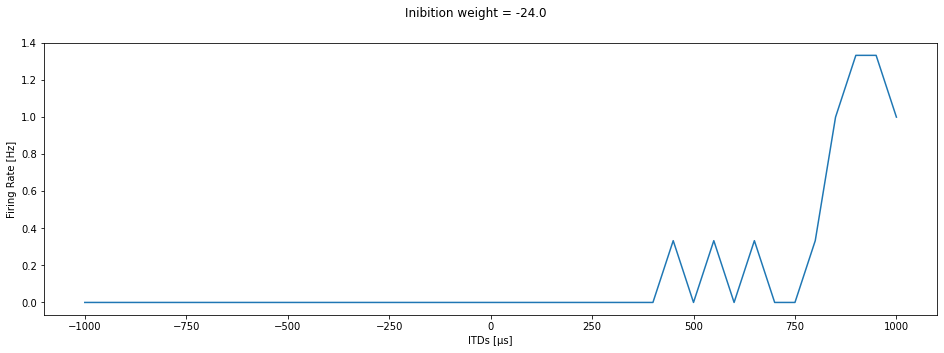

In [6]:
for i in range(n_battery):
    plt.figure(figsize = (16,5))
    plt.suptitle("Inibition weight = {}".format(MNTBCs2MSO_weights[i]))
    #plt.title("Group 1 cell {}".format(i))
    plt.plot(itds*1000, rate_groups[i][:])
    plt.ylabel('Firing Rate [Hz]')
    plt.xlabel("ITDs [\u03bcs]")
